In [2]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

In [3]:
# Step 2: Load your dataset
data = pd.read_csv(r"C:\Users\abhim\OneDrive\Desktop\Crop_recommendation.csv")

In [4]:
data.isnull().value_counts()

N      P      K      temperature  humidity  ph     rainfall  label
False  False  False  False        False     False  False     False    2200
dtype: int64

In [5]:
# Step 3: Data Preprocessing
data.fillna(data.mean(), inplace=True)


C:\Users\abhim\AppData\Local\Temp\ipykernel_11760\3708594623.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [7]:
data['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [8]:
data['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

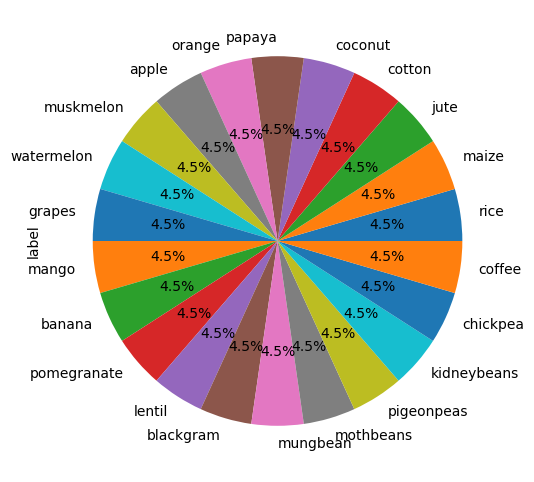

In [9]:
plt.figure(figsize=(6,6))
data['label'].value_counts().plot(kind='pie',autopct="%.1f%%")
plt.show()

In [10]:

# Step 4: Train-Test Split

np.random.seed(42)
X = data.iloc[:, :-1]  # Features
y = data['label']      # Target variable
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [11]:
# Step 5: Choose a Machine Learning Algorithm
# Naive Bayes Classifier
model = GaussianNB()


In [12]:
# Step 6: Hyperparameter Tuning (not applicable for Naive Bayes)

In [13]:
# Step 6: Evaluate Model Performance
# Train the model
model.fit(X_train, y_train)


GaussianNB()

In [14]:
# Save the model
joblib.dump(model, 'crop_recommendation_model.pkl')

['crop_recommendation_model.pkl']

In [15]:
# Predictions on the test set
y_pred = model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")

Accuracy: 0.9954545454545455


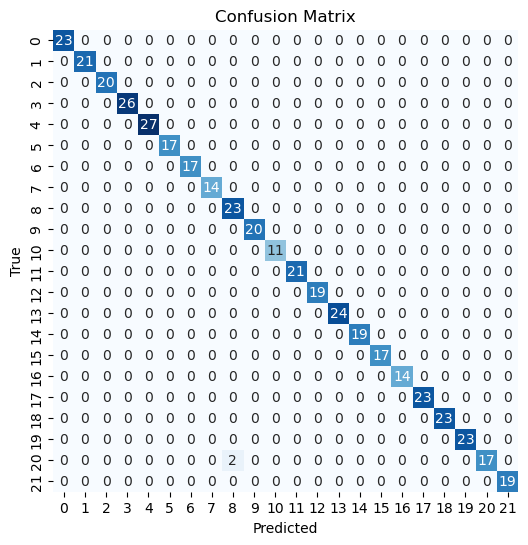

In [16]:
# Visualize Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()